# Analyse en composantes principales (ACP)


Tableau individus-variables

In [2]:
import pandas
D=pandas.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="DATA_ACP_ACTIF",index_col=0)

print(D.info())

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Alfasud TI to Lada 1300
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CYL     18 non-null     int64
 1   PUISS   18 non-null     int64
 2   LONG    18 non-null     int64
 3   LARG    18 non-null     int64
 4   POIDS   18 non-null     int64
 5   VMAX    18 non-null     int64
dtypes: int64(6)
memory usage: 1008.0+ bytes
None


In [3]:
print(D)

                  CYL  PUISS  LONG  LARG  POIDS  VMAX
Modele                                               
Alfasud TI       1350     79   393   161    870   165
Audi 100         1588     85   468   177   1110   160
Simca 1300       1294     68   424   168   1050   152
Citroen GS Club  1222     59   412   161    930   151
Fiat 132         1585     98   439   164   1105   165
Lancia Beta      1297     82   429   169   1080   160
Peugeot 504      1796     79   449   169   1160   154
Renault 16 TL    1565     55   424   163   1010   140
Renault 30       2664    128   452   173   1320   180
Toyota Corolla   1166     55   399   157    815   140
Alfetta 1.66     1570    109   428   162   1060   175
Princess 1800    1798     82   445   172   1160   158
Datsun 200L      1998    115   469   169   1370   160
Taunus 2000      1993     98   438   170   1080   167
Rancho           1442     80   431   166   1129   144
Mazda 9295       1769     83   440   165   1095   165
Opel Rekord      1979    100

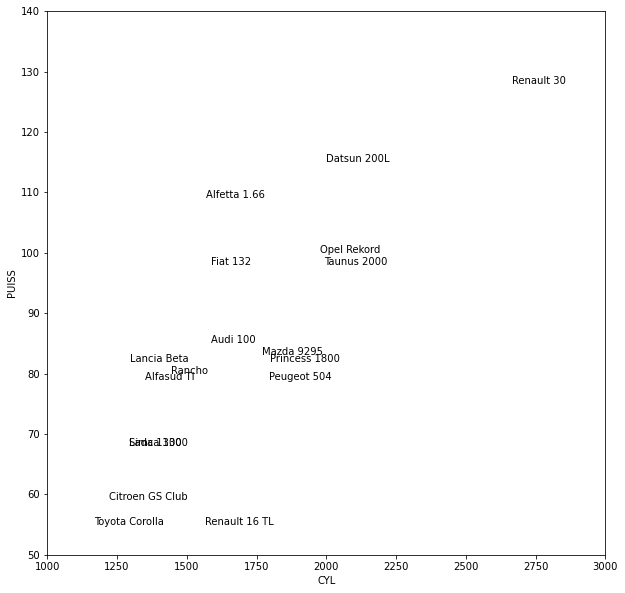

In [4]:
#importer la librairie graphique
import matplotlib.pyplot as plt
#préparer le graphique
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(D.CYL,D.PUISS,"wo")
ax.axis([1000,3000,50,140])
ax.set_xlabel("CYL")
ax.set_ylabel("PUISS")
#ajouter les labels des véhicules
for v in D.index:
 ax.text(D.CYL[v],D.PUISS[v],v)

#faire afficher
plt.show()


In [5]:
Dbis=D.sort_values(by="CYL",ascending=True)[['CYL','PUISS']]
print(Dbis)

                  CYL  PUISS
Modele                      
Toyota Corolla   1166     55
Citroen GS Club  1222     59
Lada 1300        1294     68
Simca 1300       1294     68
Lancia Beta      1297     82
Alfasud TI       1350     79
Rancho           1442     80
Renault 16 TL    1565     55
Alfetta 1.66     1570    109
Fiat 132         1585     98
Audi 100         1588     85
Mazda 9295       1769     83
Peugeot 504      1796     79
Princess 1800    1798     82
Opel Rekord      1979    100
Taunus 2000      1993     98
Datsun 200L      1998    115
Renault 30       2664    128


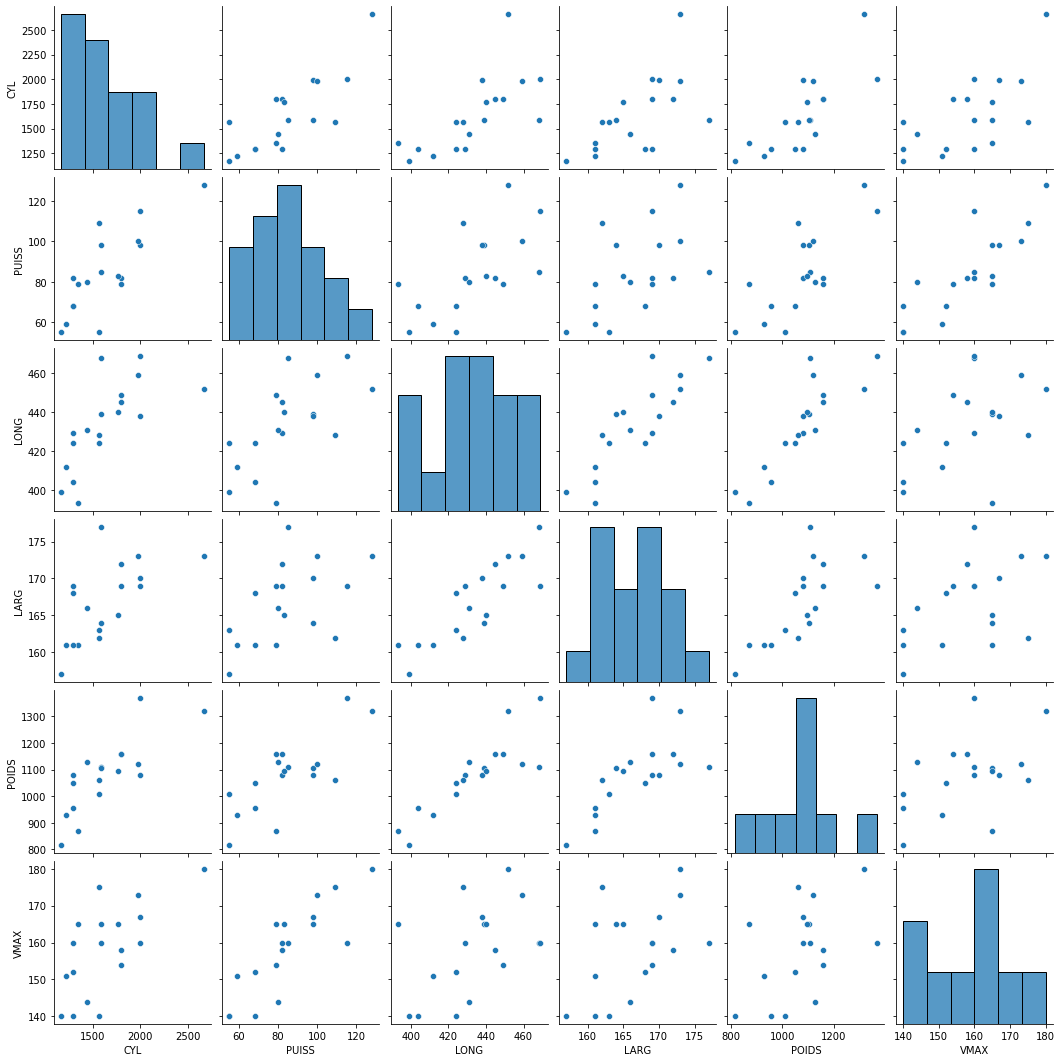

In [6]:
#librairie graphique
import seaborn as sns
#pairplot
sns.pairplot(D)

Distance entre individus et inertie

In [7]:
import numpy

numpy.sqrt(numpy.sum((Dbis.loc['Audi 100']-Dbis.loc['Fiat 132'])**2))





13.341664064126334

In [8]:
numpy.sqrt(numpy.sum((Dbis.loc['Audi 100']-Dbis.loc['Mazda 9295'])**2))


181.01104938649465

In [9]:
X = Dbis.values

In [10]:
sigmas = numpy.std(X,axis=0,ddof=0)
print(sigmas)

[363.39449027  19.80218531]


In [11]:
numpy.sqrt(numpy.sum((1/sigmas**2)*(Dbis.loc['Audi 100']-Dbis.loc['Fiat 132'])**2))


0.6565451047185447

In [12]:
numpy.sqrt(numpy.sum((1/sigmas**2)*(Dbis.loc['Audi 100']-Dbis.loc['Mazda 9295'])**2))


0.5082182304292723

In [13]:
#nombre d'observations
n= X.shape[0]
#inertie version 1 -- distances entre paires d'individus
Ip_v1=0

for i1 in range(n):
    for i2 in range(n):
           Ip_v1=Ip_v1+ numpy. sum( (X[i1,:]-X[i2,:])**2)

Ip_v1=(1/(2*n**2)) * Ip_v1
print("Inertie, Approche 1 %.2f" % (Ip_v1))

Inertie, Approche 1 132447.68


In [14]:
#moyennes des variables -Coordonnées de G
moyennes = numpy.mean(X, axis=0)
print(moyennes)

[1631.66666667   84.61111111]


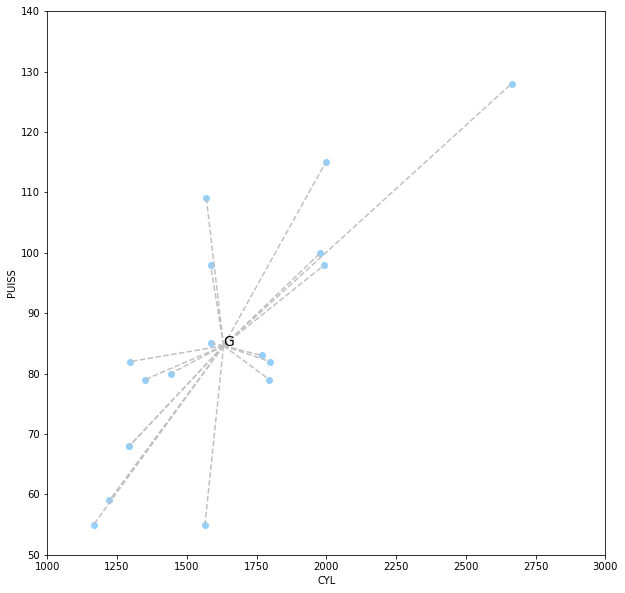

In [15]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(D.CYL,D.PUISS,color='xkcd:light blue',marker='o',linestyle='None')
ax.axis([1000,3000,50,140])
ax.set_xlabel("CYL")
ax.set_ylabel("PUISS")

for i in range(D.shape[0]):
    ax.plot([moyennes[0],D.CYL[i]],[moyennes[1],D.PUISS[i]],color='silver',linestyle='dashed')
    
ax.text(moyennes[0],moyennes[1],"G",fontsize=14)
plt.show()

In [16]:
print(moyennes)

[1631.66666667   84.61111111]


In [17]:
Ip_v2=numpy.mean(numpy.apply_along_axis(func1d=lambda x:numpy.sum((x-moyennes)**2),axis=1,arr=X))
print("inertie,Approche 2= %.2f" %(Ip_v2))

inertie,Approche 2= 132447.68


In [18]:
print(sigmas)

[363.39449027  19.80218531]


In [19]:
print("Somme des variance = %.2f" % (numpy.sum(sigmas**2)))

Somme des variance = 132447.68


In [20]:
#données centrées et réduites
Z = (X - moyennes)/sigmas
print(pandas.DataFrame(Z,index=Dbis.index))

                        0         1
Modele                             
Toyota Corolla  -1.281436 -1.495346
Citroen GS Club -1.127333 -1.293348
Lada 1300       -0.929201 -0.838852
Simca 1300      -0.929201 -0.838852
Lancia Beta     -0.920946 -0.131860
Alfasud TI      -0.775099 -0.283358
Rancho          -0.521930 -0.232859
Renault 16 TL   -0.183455 -1.495346
Alfetta 1.66    -0.169696  1.231626
Fiat 132        -0.128419  0.676132
Audi 100        -0.120163  0.019639
Mazda 9295       0.377918 -0.081360
Peugeot 504      0.452217 -0.283358
Princess 1800    0.457721 -0.131860
Opel Rekord      0.955802  0.777131
Taunus 2000      0.994328  0.676132
Datsun 200L      1.008087  1.534623
Renault 30       2.840806  2.191116


In [21]:
#vérification moyennes - nulles
print(numpy.mean(Z,axis=0))


[-1.72701359e-16 -1.48029737e-16]


In [22]:
#vérification écarts-type – égaux à 1
print(numpy.std(Z,axis=0,ddof=0))

[1. 1.]


In [23]:
#outil pour l'ACP
from sklearn.decomposition import PCA
acp = PCA()
#coordonnées factorielles
coord = acp.fit_transform(Z)
#afficher les nouvelles coordonnées
print(pandas.DataFrame(coord,index=Dbis.index))


                        0         1
Modele                             
Toyota Corolla  -1.963481 -0.151257
Citroen GS Club -1.711680 -0.117390
Lada 1300       -1.250203  0.063886
Simca 1300      -1.250203  0.063886
Lancia Beta     -0.744446  0.557968
Alfasud TI      -0.748442  0.347713
Rancho          -0.533717  0.204405
Renault 16 TL   -1.187092 -0.927647
Alfetta 1.66     0.750898  0.990885
Fiat 132         0.387292  0.568903
Audi 100        -0.071082  0.098855
Mazda 9295       0.209698 -0.324759
Peugeot 504      0.119402 -0.520131
Princess 1800    0.230419 -0.416897
Opel Rekord      1.225369 -0.126340
Taunus 2000      1.181194 -0.224999
Datsun 200L      1.797968  0.372317
Renault 30       3.558106 -0.459400


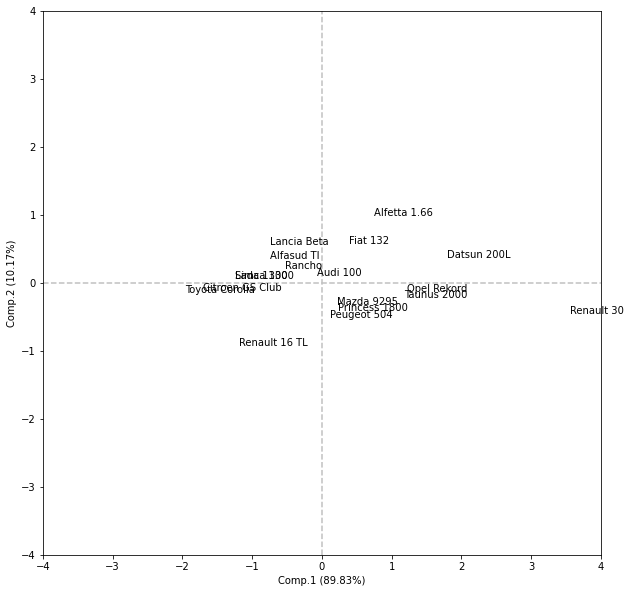

In [24]:
#position des véhicules dans le repère factoriel
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(coord[:,0],coord[:,1],"wo")
ax.axis([-4,+4,-4,+4])
ax.plot([-4,+4],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-4,+4],color='silver',linestyle='--')
ax.set_xlabel("Comp.1 (89.83%)")
ax.set_ylabel("Comp.2 (10.17%)")
#ajouter les labels des véhicules
for i in range(n):
 ax.text(coord[i,0],coord[i,1],Dbis.index[i])

#faire afficher
plt.show()


In [25]:
#calculer les lambda
lambada = numpy.mean(numpy.power(coord,2),axis=0)
print(lambada)


[1.79662771 0.20337229]


In [26]:
#part d'inertie expliquée par les axes
print(lambada/numpy.sum(lambada))

[0.89831386 0.10168614]


In [27]:
#somme des lambda = inertie totale
print("Somme des lambda = %f" % (numpy.sum(lambada)))


Somme des lambda = 2.000000


Préservation des distances

In [28]:
#data frame des données centrées et réduites
DZ = pandas.DataFrame(Z,index=Dbis.index)
#data frame des coordonnées factorielles
DC = pandas.DataFrame(coord,index=Dbis.index)
#(distance euclidienne)^2 entre les Toyota Corolla et Citroen GS
#données originelles, centrées et réduites
print(numpy.sum((DZ.loc['Toyota Corolla']-DZ.loc['Citroen GS Club'])**2))


0.06455073567278283


In [29]:
#(distance euclidienne)^2 en en prenant en compte que la première composante
print(numpy.sum((DC.loc['Toyota Corolla'][0]-DC.loc['Citroen GS Club'][0])**2))

0.06340375071089865


In [30]:
#distance initiale entre Audi 100 et Fiat 132
print(numpy.sum((DZ.loc['Audi 100']-DZ.loc['Fiat 132'])**2))

0.4310514745298847


In [31]:
#distance approchée (Facteur F1)
print(numpy.sum((DC.loc['Audi 100'][0]-DC.loc['Fiat 132'][0])**2))


0.2101060634608986


In [32]:
#distance si on prend en compte (F1, F2)
print(numpy.sum((DC.loc['Audi 100']-DC.loc['Fiat 132'])**2))


0.43105147452988485


# Analyse des relations entre les variables

In [33]:
#former la matrice X avec (p=6) variables maintenant
X = D.values


In [34]:
#calculer la matrice de covariance
#rowvar = False pour dire que les variables sont organisées en colonnes
#ddof = 0 pour utiliser (1/n)
V = numpy.cov(X,ddof=0,rowvar=False)
numpy.set_printoptions(precision=2,suppress=True)
print(V)

[[132055.56   5732.54   5476.56   1181.78  38159.61   2850.87]
 [  5732.54    392.13    272.86     53.26   2017.05    197.27]
 [  5476.56    272.86    461.58     94.22   2482.36    120.64]
 [  1181.78     53.26     94.22     26.67    492.72     28.81]
 [ 38159.61   2017.05   2482.36    492.72  17715.36    749.99]
 [  2850.87    197.27    120.64     28.81    749.99    139.2 ]]


In [35]:
#calculer la trace de la matrice V
trace = V.trace()
print(trace)

150790.49382716054


In [36]:
#vecteur moyenne pour (p = 6) variables
moyennes = numpy.mean(X,axis=0)
#inertie par l'écart au barycentre
print(numpy.mean(numpy.apply_along_axis(func1d=lambda x: numpy.sum((x-moyennes)**2),axis=1,arr=X)))

150790.4938271605


In [37]:
#matrice Z des variables centrées
Z = X - moyennes
print(pandas.DataFrame(Z,index=D.index))


                           0          1     2          3           4  \
Modele                                                                 
Alfasud TI       -281.666667  -5.611111 -40.5  -5.666667 -208.833333   
Audi 100          -43.666667   0.388889  34.5  10.333333   31.166667   
Simca 1300       -337.666667 -16.611111  -9.5   1.333333  -28.833333   
Citroen GS Club  -409.666667 -25.611111 -21.5  -5.666667 -148.833333   
Fiat 132          -46.666667  13.388889   5.5  -2.666667   26.166667   
Lancia Beta      -334.666667  -2.611111  -4.5   2.333333    1.166667   
Peugeot 504       164.333333  -5.611111  15.5   2.333333   81.166667   
Renault 16 TL     -66.666667 -29.611111  -9.5  -3.666667  -68.833333   
Renault 30       1032.333333  43.388889  18.5   6.333333  241.166667   
Toyota Corolla   -465.666667 -29.611111 -34.5  -9.666667 -263.833333   
Alfetta 1.66      -61.666667  24.388889  -5.5  -4.666667  -18.833333   
Princess 1800     166.333333  -2.611111  11.5   5.333333   81.16

In [38]:
#(1/n) (Z'Z) ➔ V
print(numpy.dot(numpy.transpose(Z),Z)/n)

[[132055.56   5732.54   5476.56   1181.78  38159.61   2850.87]
 [  5732.54    392.13    272.86     53.26   2017.05    197.27]
 [  5476.56    272.86    461.58     94.22   2482.36    120.64]
 [  1181.78     53.26     94.22     26.67    492.72     28.81]
 [ 38159.61   2017.05   2482.36    492.72  17715.36    749.99]
 [  2850.87    197.27    120.64     28.81    749.99    139.2 ]]


In [39]:
#matrice des corrélations
R = numpy.corrcoef(X,rowvar=False)
print(R)


[[1.   0.8  0.7  0.63 0.79 0.66]
 [0.8  1.   0.64 0.52 0.77 0.84]
 [0.7  0.64 1.   0.85 0.87 0.48]
 [0.63 0.52 0.85 1.   0.72 0.47]
 [0.79 0.77 0.87 0.72 1.   0.48]
 [0.66 0.84 0.48 0.47 0.48 1.  ]]


In [40]:
#vecteur ecart-type pour (p = 6) variables
sigmas = numpy.std(X,axis=0)
#centrage et réduction
Z = (X - moyennes)/sigmas
#correspondance : produit matriciel : (1/n) (Z'Z)
print(numpy.dot(numpy.transpose(Z),Z)/n)


[[1.   0.8  0.7  0.63 0.79 0.66]
 [0.8  1.   0.64 0.52 0.77 0.84]
 [0.7  0.64 1.   0.85 0.87 0.48]
 [0.63 0.52 0.85 1.   0.72 0.47]
 [0.79 0.77 0.87 0.72 1.   0.48]
 [0.66 0.84 0.48 0.47 0.48 1.  ]]


<AxesSubplot:>

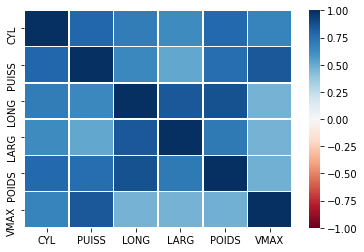

In [41]:
#heatmap pour identifier visuellement les corrélations fortes
sns.heatmap(R,xticklabels=D.columns,yticklabels=D.columns,vmin=-1,vmax=+1,center=0
,cmap="RdBu",linewidths=0.5)

In [42]:
#acp sur Z (p = 6 variables)
acp = PCA()


In [43]:
#coordonnées factorielles
coord = acp.fit_transform(Z)
#afficher les nouvelles coordonnées des premiers véhicules
print(pandas.DataFrame(coord,index=Dbis.index).head())

                        0         1         2         3         4         5
Modele                                                                     
Toyota Corolla  -2.138924  1.785681  0.571862  0.201927 -0.301357  0.053921
Citroen GS Club  1.561459 -1.527040  1.315271 -0.211352  0.148516 -0.327238
Lada 1300       -1.119385 -0.674505  0.456588 -0.167626 -0.375364  0.271803
Simca 1300      -2.573742  0.112884  0.148570 -0.017343  0.226853  0.263476
Lancia Beta      0.427855  0.695567 -0.193286 -0.627754  0.263505 -0.037153


In [44]:
#nombre de variables
p = Z.shape[1]
print(p)

6


In [45]:
#corrélation des facteurs avec les variables
Mlambda = numpy.corrcoef(x=coord,y=Z,rowvar=False)[:p,p:]
#affichage des corrélations : lignes = facteurs, colonnes = variables
print(Mlambda)


[[ 0.89  0.89  0.89  0.81  0.91  0.75]
 [ 0.11  0.38 -0.38 -0.41 -0.22  0.57]
 [-0.22 -0.11  0.04  0.37 -0.3   0.3 ]
 [ 0.37 -0.17 -0.13  0.1  -0.14 -0.03]
 [ 0.05 -0.09  0.22 -0.15 -0.09  0.06]
 [-0.01 -0.13 -0.04 -0.02  0.12  0.1 ]]


In [46]:
#somme des corrélations^2 entre les variables et les facteurs
#on doit obtenir les lambda_k
slambda = numpy.sum(Mlambda**2,axis=1)
print(slambda)

[4.42 0.86 0.37 0.21 0.09 0.04]


In [47]:
#dont la somme totale (des lambda) = inertie = p puisque ACP normée
print(numpy.sum(slambda))

6.000000000000002


In [48]:
#faire le lien avec le premier prisme
#variance des coordonnées factorielles
print(numpy.var(coord,axis=0,ddof=0))

[4.42 0.86 0.37 0.21 0.09 0.04]


Préservation des corrélations

In [49]:
#liste des variables
print(D.columns)


Index(['CYL', 'PUISS', 'LONG', 'LARG', 'POIDS', 'VMAX'], dtype='object')


In [50]:
#corrélation entre CYL et POIDS
print(R[0,4])


0.7889520283865826


In [51]:
#corrélation approchée sur le premier facteur
print(Mlambda[0,0]*Mlambda[0,4])

0.8087519932967818


In [52]:
#corrélation approchée sur les 2 premiers facteurs
print(Mlambda[0,0]*Mlambda[0,4]+Mlambda[1,0]*Mlambda[1,4])

0.7829518411637988


In [53]:
#corrélation entre POIDS et VMAX
print(R[4,5])


0.4775955992662051


In [54]:
#corrélation approchée sur le premier facteur
print(Mlambda[0,4]*Mlambda[0,5])


0.6831543614480379


In [55]:
#corrélation approchée sur les 2 premiers facteurs
print(Mlambda[0,4]*Mlambda[0,5]+Mlambda[1,4]*Mlambda[1,5])

0.55438062524932


Organisations des calculs


# Calculs (1) – Diagonalisation de la matrice des corrélations


In [56]:
#rappel matrice des corrélations
print(R)

[[1.   0.8  0.7  0.63 0.79 0.66]
 [0.8  1.   0.64 0.52 0.77 0.84]
 [0.7  0.64 1.   0.85 0.87 0.48]
 [0.63 0.52 0.85 1.   0.72 0.47]
 [0.79 0.77 0.87 0.72 1.   0.48]
 [0.66 0.84 0.48 0.47 0.48 1.  ]]


In [57]:
#calcul des valeurs et vecteurs propres
sol = numpy.linalg.eig(R)
print(sol)

(array([4.42, 0.86, 0.37, 0.21, 0.09, 0.04]), array([[-0.42, -0.12, -0.35,  0.81,  0.15, -0.06],
       [-0.42, -0.42, -0.18, -0.36, -0.29, -0.63],
       [-0.42,  0.41,  0.07, -0.28,  0.73, -0.19],
       [-0.39,  0.45,  0.6 ,  0.21, -0.48, -0.11],
       [-0.43,  0.24, -0.48, -0.3 , -0.3 ,  0.58],
       [-0.36, -0.62,  0.49, -0.07,  0.19,  0.46]]))


In [58]:
#valeurs propres
print(sol[0])


[4.42 0.86 0.37 0.21 0.09 0.04]


In [59]:
#vecteurs propres pour le premier facteur
print(sol[1][:,0])

[-0.42 -0.42 -0.42 -0.39 -0.43 -0.36]


In [60]:
#vérifions sa norme
print(numpy.linalg.norm(sol[1][:,0]))

0.9999999999999999


In [61]:
#base orthonormale ?
print(numpy.dot(numpy.transpose(sol[1]),sol[1]))

[[ 1. -0.  0.  0. -0. -0.]
 [-0.  1.  0.  0.  0.  0.]
 [ 0.  0.  1. -0. -0. -0.]
 [ 0.  0. -0.  1. -0.  0.]
 [-0.  0. -0. -0.  1.  0.]
 [-0.  0. -0.  0.  0.  1.]]


In [62]:
#coordonnées factorielles sur le premier facteur (n°0)
#produit matriciel
c1 = numpy.dot(Z,sol[1][:,0])
#affichage avec les identifiants des véhicules
print(pandas.DataFrame(c1,columns=['F_1'],index=D.index))

                      F_1
Modele                   
Alfasud TI       2.138924
Audi 100        -1.561459
Simca 1300       1.119385
Citroen GS Club  2.573742
Fiat 132        -0.427855
Lancia Beta      0.304238
Peugeot 504     -0.683928
Renault 16 TL    1.948493
Renault 30      -4.409735
Toyota Corolla   3.985782
Alfetta 1.66    -0.437658
Princess 1800   -1.018175
Datsun 200L     -2.941080
Taunus 2000     -1.314880
Rancho           0.691111
Mazda 9295      -0.385709
Opel Rekord     -2.289768
Lada 1300        2.708574


In [63]:
#corrélation des variables avec le premier facteur
r_1 = numpy.sqrt(sol[0][0])*sol[1][:,0]

In [64]:
#affichage des corrélations
print(pandas.DataFrame(r_1,index=D.columns))

              0
CYL   -0.893464
PUISS -0.886858
LONG  -0.886155
LARG  -0.813536
POIDS -0.905187
VMAX  -0.754710


# Calculs (2) – Décomposition en valeurs singulières

In [65]:
#décomposition en valeurs singulières
Us, delta, Vs = numpy.linalg.svd(Z)

In [66]:
#vecteur des valeurs singulières
print(delta)

[8.92 3.93 2.59 1.96 1.29 0.88]


In [67]:
#et pour obtenir les lambda_k
print((delta**2)/n)


[4.42 0.86 0.37 0.21 0.09 0.04]


In [68]:
#matrice singulière à droite (d'entrée)
print(numpy.transpose(Vs))

[[ 0.42 -0.12  0.35 -0.81 -0.15  0.06]
 [ 0.42 -0.42  0.18  0.36  0.29  0.63]
 [ 0.42  0.41 -0.07  0.28 -0.73  0.19]
 [ 0.39  0.45 -0.6  -0.21  0.48  0.11]
 [ 0.43  0.24  0.48  0.3   0.3  -0.58]
 [ 0.36 -0.62 -0.49  0.07 -0.19 -0.46]]


In [69]:
#vérification -- vecteurs propres de (Z'Z) -- OK
print(numpy.linalg.eig(numpy.dot(numpy.transpose(Z),Z))[1])

[[-0.42 -0.12 -0.35  0.81  0.15 -0.06]
 [-0.42 -0.42 -0.18 -0.36 -0.29 -0.63]
 [-0.42  0.41  0.07 -0.28  0.73 -0.19]
 [-0.39  0.45  0.6   0.21 -0.48 -0.11]
 [-0.43  0.24 -0.48 -0.3  -0.3   0.58]
 [-0.36 -0.62  0.49 -0.07  0.19  0.46]]


In [70]:
#matrice singulière à gauche (de sortie)
print(Us)


[[-0.24 -0.45 -0.22 -0.1   0.23 -0.06  0.31  0.21  0.17 -0.23 -0.2   0.14
   0.4  -0.03 -0.04  0.24  0.17 -0.3 ]
 [ 0.18  0.39 -0.51  0.11 -0.11  0.37  0.09  0.25  0.42 -0.06 -0.11  0.1
  -0.04 -0.06 -0.02  0.19 -0.29  0.05]
 [-0.13  0.17 -0.18  0.09  0.29 -0.31 -0.16 -0.16  0.43  0.12  0.47 -0.25
   0.    0.24 -0.29  0.16  0.17 -0.09]
 [-0.29 -0.03 -0.06  0.01 -0.18 -0.3  -0.09 -0.17  0.45 -0.2  -0.31  0.21
  -0.06  0.26  0.22 -0.45 -0.02  0.24]
 [ 0.05 -0.18  0.07  0.32 -0.2   0.04  0.08  0.19  0.04  0.15 -0.27  0.11
  -0.55  0.27 -0.34  0.12  0.36 -0.15]
 [-0.03  0.05 -0.26  0.28  0.34 -0.23  0.09  0.33 -0.23  0.51 -0.23 -0.13
   0.14  0.1   0.17 -0.15  0.03  0.31]
 [ 0.08  0.24  0.1  -0.1  -0.16 -0.17  0.89 -0.13  0.03  0.05  0.13 -0.08
  -0.02  0.07 -0.01 -0.09  0.04  0.05]
 [-0.22  0.25  0.24 -0.32 -0.23 -0.12 -0.11  0.76  0.03 -0.08  0.18 -0.06
   0.05  0.07 -0.01 -0.09  0.1  -0.04]
 [ 0.49 -0.27  0.23 -0.43  0.29 -0.05  0.    0.12  0.44  0.25 -0.1  -0.04
  -0.19 -0.14  0.06 -0.

In [71]:
#coordonnées factorielles - 1er facteur
print(pandas.DataFrame(Us[:,0]*delta[0],columns=['F_1'],index=D.index))


                      F_1
Modele                   
Alfasud TI      -2.138924
Audi 100         1.561459
Simca 1300      -1.119385
Citroen GS Club -2.573742
Fiat 132         0.427855
Lancia Beta     -0.304238
Peugeot 504      0.683928
Renault 16 TL   -1.948493
Renault 30       4.409735
Toyota Corolla  -3.985782
Alfetta 1.66     0.437658
Princess 1800    1.018175
Datsun 200L      2.941080
Taunus 2000      1.314880
Rancho          -0.691111
Mazda 9295       0.385709
Opel Rekord      2.289768
Lada 1300       -2.708574


# Pratique de l’ACP avec « fanalysis » sous Python

In [72]:
#chargement des données - index_col = 0 : indiquer que la colonne n°0 est un label
import pandas
D = pandas.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="DATA_ACP_ACTIF",index_col=0)
#affichage des caractéristiques
print(D.info())


<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Alfasud TI to Lada 1300
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CYL     18 non-null     int64
 1   PUISS   18 non-null     int64
 2   LONG    18 non-null     int64
 3   LARG    18 non-null     int64
 4   POIDS   18 non-null     int64
 5   VMAX    18 non-null     int64
dtypes: int64(6)
memory usage: 1008.0+ bytes
None


In [73]:
#nombre de variables
p = D.shape[1]
#nombre d'observations
n = D.shape[0]
#matrice des X
X = D.values


In [74]:
pip install fanalysis

Note: you may need to restart the kernel to use updated packages.


In [75]:
#importer la classe de calcul
from fanalysis.pca import PCA
#instancier l'objet de calcul
#std_unit = True ➔ ACP normée
acp = PCA(std_unit=True,row_labels=D.index,col_labels=D.columns)
#lancer les calculs sur les données
acp.fit(X)
#propriétés de l'objet généré
print(dir(acp))


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_n_features', '_compute_stats', '_compute_svd', '_get_param_names', '_get_tags', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', 'col_contrib_', 'col_coord_', 'col_cor_', 'col_cos2_', 'col_labels', 'col_labels_', 'col_labels_short_', 'col_topandas', 'correlation_circle', 'eig_', 'eigen_vectors_', 'fit', 'fit_transform', 'get_params', 'mapping', 'mapping_col', 'mapping_row', 'means_', 'model_', 'n_components', 'n_components_', 'plot_col_contrib', 'plot_col_cos2', 'plot_eigenvalues', 'plot_row_contrib', 'plot_row_cos2', 'row_contrib_', 'row_coord_', 'row_cos2_', 'row_labe

In [76]:
#valeurs propres
print(acp.eig_)

[[  4.42   0.86   0.37   0.21   0.09   0.04]
 [ 73.68  14.27   6.22   3.57   1.55   0.72]
 [ 73.68  87.95  94.17  97.73  99.28 100.  ]]


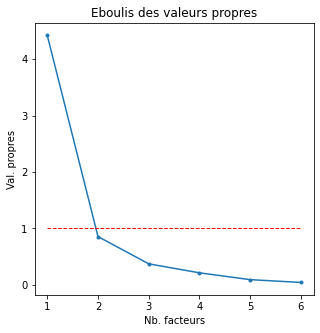

In [77]:
%matplotlib inline
#librairie graphique
import matplotlib.pyplot as plt
#préparer le graphique
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("Val. propres")
plt.title("Eboulis des valeurs propres")
#rajout du seuil du Kaiser
ax.plot([1,6],[1,1],"r--",linewidth=1)
plt.show()

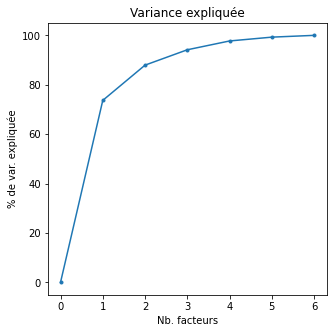

In [78]:
#proportion de variance expliquée
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(0,p+1),numpy.append(0,acp.eig_[2]),".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("% de var. expliquée")
plt.title("Variance expliquée")
plt.show()

In [79]:
#librairie pour calc. math
import math
#seuil de Karlis-Saporta-Spinaki
kss = 1+2*math.sqrt((p-1)/(n-1))
print(kss)


2.084652289093281


# Test de sphéricité de Bartlett

In [80]:
#librairie pour calculs matriciels
import numpy
#librairie pour calculs statistiques
import scipy.stats as stats
#stat. de test Bartlett
C = -(n-1-(2*p+5)/6) * numpy.sum(numpy.log(acp.eig_[0]))
print(C)

95.11987830353813


In [81]:
#degrés de liberté
ddl = p*(p-1)/2
#p-value
print(1-stats.chi2.cdf(C,df=ddl))


1.0891287871572786e-13


In [82]:
#seuils pour test des bâtons brisés
b = numpy.flip(numpy.cumsum(1/numpy.arange(p,0,-1)))
print(b)


[2.45 1.45 0.95 0.62 0.37 0.17]


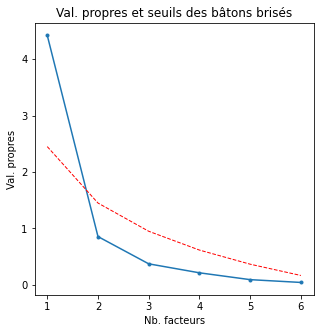

In [83]:
#vérification des v.p. qui passent
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. facteurs")
ax.set_ylabel("Val. propres")
plt.title("Val. propres et seuils des bâtons brisés")
#rajout du seuil des bâtons brisés
ax.plot(range(1,p+1),b,"r--",linewidth=1)

Représentation des variables et aides à l’interprétation

In [84]:
#corrélation des variables avec les facteurs
print(pandas.DataFrame(acp.col_coord_[:,:2],index=D.columns))

              0         1
CYL    0.893464 -0.114906
PUISS  0.886858 -0.384689
LONG   0.886155  0.381029
LARG   0.813536  0.412736
POIDS  0.905187  0.224532
VMAX   0.754710 -0.573519


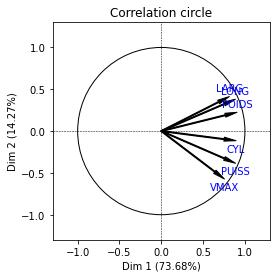

In [85]:
#cercle des corrélations
acp.correlation_circle(num_x_axis=1,num_y_axis=2)


In [86]:
#cos2 des variables sur les 2 facteurs
print(pandas.DataFrame(acp.col_cos2_[:,:2],index=D.columns))


              0         1
CYL    0.798277  0.013203
PUISS  0.786517  0.147986
LONG   0.785270  0.145183
LARG   0.661841  0.170351
POIDS  0.819364  0.050415
VMAX   0.569588  0.328925


In [87]:
#cos2 cumulé sur les 2 premiers facteurs
print(pandas.DataFrame(numpy.cumsum(acp.col_cos2_[:,:2],axis=1),index=D.columns))

              0         1
CYL    0.798277  0.811481
PUISS  0.786517  0.934503
LONG   0.785270  0.930453
LARG   0.661841  0.832192
POIDS  0.819364  0.869779
VMAX   0.569588  0.898512


In [88]:
#contributions des variables sur les 2 premiers facteurs (en %)
print(pandas.DataFrame(acp.col_contrib_[:,:2],index=D.columns))

               0          1
CYL    18.057062   1.542342
PUISS  17.791052  17.286793
LONG   17.762847  16.959384
LARG   14.970882  19.899361
POIDS  18.534057   5.889155
VMAX   12.884099  38.422964


In [89]:
#coordonnées factorielles des individus dans le plan
print(pandas.DataFrame(acp.row_coord_[:,:2],index=D.index))


                        0         1
Modele                             
Alfasud TI      -2.138924 -1.785681
Audi 100         1.561459  1.527040
Simca 1300      -1.119385  0.674505
Citroen GS Club -2.573742 -0.112884
Fiat 132         0.427855 -0.695567
Lancia Beta     -0.304238  0.196149
Peugeot 504      0.683928  0.933057
Renault 16 TL   -1.948493  0.980448
Renault 30       4.409735 -1.063633
Toyota Corolla  -3.985782 -0.236240
Alfetta 1.66     0.437658 -1.912448
Princess 1800    1.018175  0.841712
Datsun 200L      2.941080  0.559175
Taunus 2000      1.314880 -0.486522
Rancho          -0.691111  0.897721
Mazda 9295       0.385709 -0.356185
Opel Rekord      2.289768 -0.104345
Lada 1300       -2.708574  0.143699


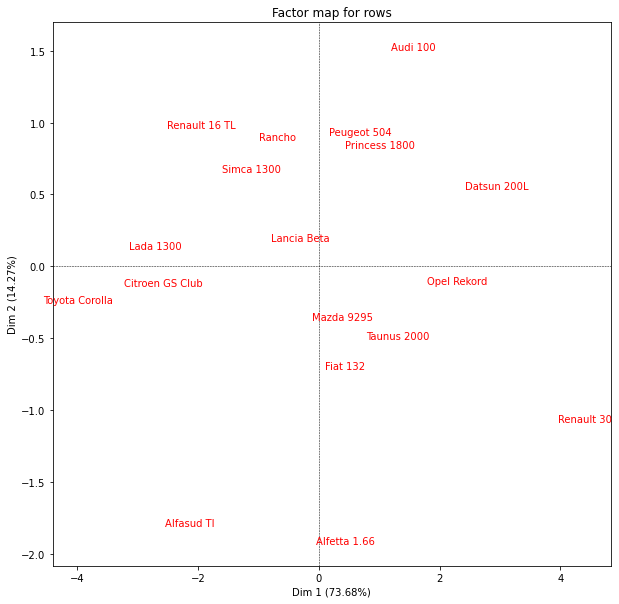

In [90]:
#carte des individus
acp.mapping_row(num_x_axis=1,num_y_axis=2,figsize=(10,10))


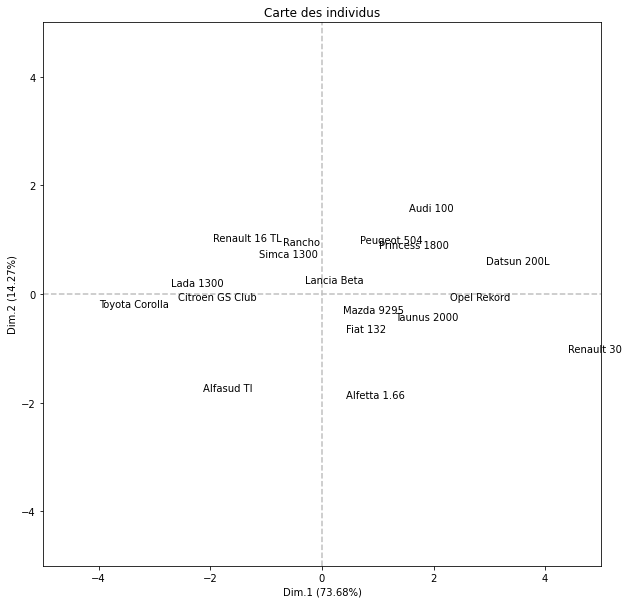

In [91]:
#graphique avec les échelles carrées
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(acp.row_coord_[:,0],acp.row_coord_[:,1],'wo')
ax.axis([-5,+5,-5,+5])
ax.plot([-5,+5],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-5,+5],color='silver',linestyle='--')
ax.set_xlabel("Dim.1 (73.68%)")
ax.set_ylabel("Dim.2 (14.27%)")
plt.title("Carte des individus")
for i in range(n):
 ax.text(acp.row_coord_[i,0],acp.row_coord_[i,1],D.index[i])

plt.show()


In [92]:
#données cenrrées et réduites
Z = (D.values - acp.means_) / acp.std_
#distance à l'origine des individus dans le repère initial
disto = numpy.apply_along_axis(arr=Z,axis=1,func1d=lambda x: numpy.sum(x**2))
#distance à l'origine à partir des coordonnées factorielles
distoBis = numpy.sum(acp.row_coord_**2,axis=1)
#affichage de contrôle
print(pandas.DataFrame(numpy.transpose(numpy.array([disto,distoBis])),index=D.index))


                         0          1
Modele                               
Alfasud TI        8.225176   8.225176
Audi 100          6.673755   6.673755
Simca 1300        2.159327   2.159327
Citroen GS Club   6.780145   6.780145
Fiat 132          1.169124   1.169124
Lancia Beta       1.134950   1.134950
Peugeot 504       1.512793   1.512793
Renault 16 TL     5.636826   5.636826
Renault 30       21.789657  21.789657
Toyota Corolla   16.290143  16.290143
Alfetta 1.66      4.456770   4.456770
Princess 1800     1.952513   1.952513
Datsun 200L      11.112624  11.112624
Taunus 2000       2.452986   2.452986
Rancho            1.963373   1.963373
Mazda 9295        0.684521   0.684521
Opel Rekord       6.083119   6.083119
Lada 1300         7.922198   7.922198


In [93]:
#cos2 des individus
lig_cos2 = numpy.apply_along_axis(arr=acp.row_coord_[:,:2],axis=0,func1d=lambda x: (x**2)/disto)
print(pandas.DataFrame(lig_cos2,index=D.index))


                        0         1
Modele                             
Alfasud TI       0.556218  0.387670
Audi 100         0.365334  0.349406
Simca 1300       0.580284  0.210694
Citroen GS Club  0.976992  0.001879
Fiat 132         0.156579  0.413826
Lancia Beta      0.081555  0.033900
Peugeot 504      0.309202  0.575488
Renault 16 TL    0.673539  0.170535
Renault 30       0.892431  0.051920
Toyota Corolla   0.975219  0.003426
Alfetta 1.66     0.042978  0.820652
Princess 1800    0.530947  0.362855
Datsun 200L      0.778390  0.028137
Taunus 2000      0.704819  0.096496
Rancho           0.243273  0.410469
Mazda 9295       0.217336  0.185337
Opel Rekord      0.861900  0.001790
Lada 1300        0.926052  0.002607


In [94]:
#cumul sur les 2 premiers facteurs
print(pandas.DataFrame(numpy.cumsum(acp.row_cos2_[:,:2],axis=1),index=D.index))


                        0         1
Modele                             
Alfasud TI       0.556218  0.943889
Audi 100         0.365334  0.714741
Simca 1300       0.580284  0.790978
Citroen GS Club  0.976992  0.978871
Fiat 132         0.156579  0.570405
Lancia Beta      0.081555  0.115454
Peugeot 504      0.309202  0.884690
Renault 16 TL    0.673539  0.844075
Renault 30       0.892431  0.944351
Toyota Corolla   0.975219  0.978645
Alfetta 1.66     0.042978  0.863630
Princess 1800    0.530947  0.893802
Datsun 200L      0.778390  0.806527
Taunus 2000      0.704819  0.801315
Rancho           0.243273  0.653742
Mazda 9295       0.217336  0.402674
Opel Rekord      0.861900  0.863690
Lada 1300        0.926052  0.928659


In [95]:
#contributions sur les 2 premiers facteurs
lig_ctr = (acp.row_coord_[:,:2]**2)/(n*acp.eig_[0][:2])*100
print(pandas.DataFrame(lig_ctr,index=D.index))

                         0          1
Modele                               
Alfasud TI        5.749254  20.693307
Audi 100          3.063951  15.132933
Simca 1300        1.574636   2.952519
Citroen GS Club   8.324360   0.082697
Fiat 132          0.230046   3.139789
Lancia Beta       0.116318   0.249686
Peugeot 504       0.587817   5.649867
Renault 16 TL     4.771099   6.238372
Renault 30       24.436884   7.341856
Toyota Corolla   19.964025   0.362185
Alfetta 1.66      0.240708  23.735669
Princess 1800     1.302765   4.597791
Datsun 200L      10.870129   2.029163
Taunus 2000       2.172668   1.536130
Rancho            0.600229   5.230043
Mazda 9295        0.186956   0.823327
Opel Rekord       6.588764   0.070658
Lada 1300         9.219391   0.134007


In [96]:
#vérification avec l'outil PCA
print(pandas.DataFrame(acp.row_contrib_[:,:2],index=D.index))


                         0          1
Modele                               
Alfasud TI        5.749254  20.693307
Audi 100          3.063951  15.132933
Simca 1300        1.574636   2.952519
Citroen GS Club   8.324360   0.082697
Fiat 132          0.230046   3.139789
Lancia Beta       0.116318   0.249686
Peugeot 504       0.587817   5.649867
Renault 16 TL     4.771099   6.238372
Renault 30       24.436884   7.341856
Toyota Corolla   19.964025   0.362185
Alfetta 1.66      0.240708  23.735669
Princess 1800     1.302765   4.597791
Datsun 200L      10.870129   2.029163
Taunus 2000       2.172668   1.536130
Rancho            0.600229   5.230043
Mazda 9295        0.186956   0.823327
Opel Rekord       6.588764   0.070658
Lada 1300         9.219391   0.134007


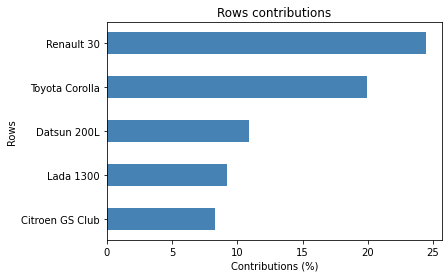

In [97]:
#affichage graphique - 1er facteur
acp.plot_row_contrib(num_axis=1,nb_values=5)

In [98]:
#coordonnées des individus à partir des variables - Facteur 1
f1 = 1/math.sqrt(acp.eig_[0][0]) * numpy.dot(Z,acp.col_coord_[:,0])
#affichage + vérification avec coordonnées de PCA
print(pandas.DataFrame(numpy.transpose(numpy.array([f1,acp.row_coord_[:,0]])),index=D.index))


                        0         1
Modele                             
Alfasud TI      -2.138924 -2.138924
Audi 100         1.561459  1.561459
Simca 1300      -1.119385 -1.119385
Citroen GS Club -2.573742 -2.573742
Fiat 132         0.427855  0.427855
Lancia Beta     -0.304238 -0.304238
Peugeot 504      0.683928  0.683928
Renault 16 TL   -1.948493 -1.948493
Renault 30       4.409735  4.409735
Toyota Corolla  -3.985782 -3.985782
Alfetta 1.66     0.437658  0.437658
Princess 1800    1.018175  1.018175
Datsun 200L      2.941080  2.941080
Taunus 2000      1.314880  1.314880
Rancho          -0.691111 -0.691111
Mazda 9295       0.385709  0.385709
Opel Rekord      2.289768  2.289768
Lada 1300       -2.708574 -2.708574


In [99]:
#coordonnées des variables à partir des individus
r1 = 1/(n*math.sqrt(acp.eig_[0][0])) * numpy.dot(numpy.transpose(Z),acp.row_coord_[:,0])
#affichage + vérification avec corrélations de PCA
print(pandas.DataFrame(numpy.transpose(numpy.array([r1,acp.col_coord_[:,0]])),index=D.columns))

              0         1
CYL    0.893464  0.893464
PUISS  0.886858  0.886858
LONG   0.886155  0.886155
LARG   0.813536  0.813536
POIDS  0.905187  0.905187
VMAX   0.754710  0.754710


# Reconstitution des données

In [100]:
#vecteurs propres (q = 2) premiers facteurs
print(acp.eigen_vectors_[:,:2])


[[ 0.42 -0.12]
 [ 0.42 -0.42]
 [ 0.42  0.41]
 [ 0.39  0.45]
 [ 0.43  0.24]
 [ 0.36 -0.62]]


In [101]:
#valeurs centrées et réduites reconstituées
ZC = numpy.dot(acp.row_coord_[:,:2],numpy.transpose(acp.eigen_vectors_[:,:2]))
print(ZC)


[[-0.69 -0.16 -1.64 -1.62 -1.35  0.34]
 [ 0.47  0.02  1.29  1.29  1.04 -0.39]
 [-0.56 -0.75 -0.19 -0.13 -0.32 -0.82]
 [-1.08 -1.04 -1.13 -1.05 -1.14 -0.85]
 [ 0.27  0.47 -0.11 -0.14  0.02  0.58]
 [-0.15 -0.21 -0.05 -0.03 -0.08 -0.23]
 [ 0.17 -0.1   0.67  0.68  0.52 -0.33]
 [-0.95 -1.23 -0.42 -0.32 -0.6  -1.31]
 [ 2.01  2.3   1.42  1.23  1.64  2.24]
 [-1.66 -1.58 -1.78 -1.65 -1.77 -1.28]
 [ 0.42  0.98 -0.6  -0.68 -0.28  1.34]
 [ 0.33  0.08  0.78  0.77  0.64 -0.16]
 [ 1.18  1.01  1.47  1.39  1.4   0.71]
 [ 0.62  0.76  0.35  0.29  0.45  0.77]
 [-0.41 -0.66  0.08  0.13 -0.08 -0.8 ]
 [ 0.21  0.31  0.02 -0.01  0.08  0.36]
 [ 0.99  1.01  0.92  0.84  0.96  0.89]
 [-1.17 -1.2  -1.08 -0.98 -1.13 -1.06]]


In [102]:
#moyennes
print(acp.means_)


[[1631.67   84.61  433.5   166.67 1078.83  158.28]]


In [103]:
#écarts-type
print(acp.std_)


[[363.39  19.8   21.48   5.16 133.1   11.8 ]]


In [104]:
#déstandardisation et décentrage
XC = ZC.copy()


In [105]:
#boucle sur les variables
for j in range(p):
 XC[:,j] = ZC[:,j] * acp.std_[0][j] + acp.means_[0][j]


In [106]:
#print des valeurs approchées
print(pandas.DataFrame(XC,columns=D.columns,index=D.index).round(1))


                    CYL  PUISS   LONG   LARG   POIDS   VMAX
Modele                                                     
Alfasud TI       1382.0   81.4  398.3  158.3   898.6  162.3
Audi 100         1803.9   85.1  461.1  173.3  1217.6  153.7
Simca 1300       1428.4   69.7  429.3  166.0  1036.5  148.6
Citroen GS Club  1239.3   64.0  409.2  161.3   927.7  148.2
Fiat 132         1729.1   93.9  431.2  165.9  1080.9  165.2
Lancia Beta      1575.8   80.5  432.5  166.5  1067.7  155.6
Peugeot 504      1695.2   82.6  447.9  170.2  1148.2  154.4
Renault 16 TL    1286.5   60.3  424.5  165.0   998.9  142.9
Renault 30       2360.6  130.2  464.0  173.0  1297.2  184.7
Toyota Corolla   1026.8   53.3  395.3  158.2   842.8  143.1
Alfetta 1.66     1785.6  104.0  420.5  163.1  1042.1  174.1
Princess 1800    1750.9   86.2  450.2  170.6  1164.4  156.4
Datsun 200L      2060.6  104.6  465.1  173.8  1265.4  166.6
Taunus 2000      1856.7   99.6  441.1  168.2  1138.5  167.4
Rancho           1484.4   71.4  435.2  1

In [107]:
#print des valeurs initiales pour comparaisons
print(D)

                  CYL  PUISS  LONG  LARG  POIDS  VMAX
Modele                                               
Alfasud TI       1350     79   393   161    870   165
Audi 100         1588     85   468   177   1110   160
Simca 1300       1294     68   424   168   1050   152
Citroen GS Club  1222     59   412   161    930   151
Fiat 132         1585     98   439   164   1105   165
Lancia Beta      1297     82   429   169   1080   160
Peugeot 504      1796     79   449   169   1160   154
Renault 16 TL    1565     55   424   163   1010   140
Renault 30       2664    128   452   173   1320   180
Toyota Corolla   1166     55   399   157    815   140
Alfetta 1.66     1570    109   428   162   1060   175
Princess 1800    1798     82   445   172   1160   158
Datsun 200L      1998    115   469   169   1370   160
Taunus 2000      1993     98   438   170   1080   167
Rancho           1442     80   431   166   1129   144
Mazda 9295       1769     83   440   165   1095   165
Opel Rekord      1979    100

# Projection des individus supplémentaires

In [108]:
#chargement des obs. supplémentaires
IndSup = pandas.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="DATA_ACP_IND_SUP",index_col=0)
print(IndSup)


                CYL  PUISS  LONG  LARG  POIDS  VMAX
Modele                                             
Peugeot 604    2664    136   472   177   1410   180
Peugeot 304 S  1288     74   414   157    915   160


In [109]:
#coordonnées factorielles des individus supplémentaires
coordSup = acp.transform(IndSup.values)
print(coordSup)


[[ 5.56 -0.34  0.46 -0.4   0.39  0.08]
 [-2.21 -1.26  0.09  0.35 -0.65 -0.12]]


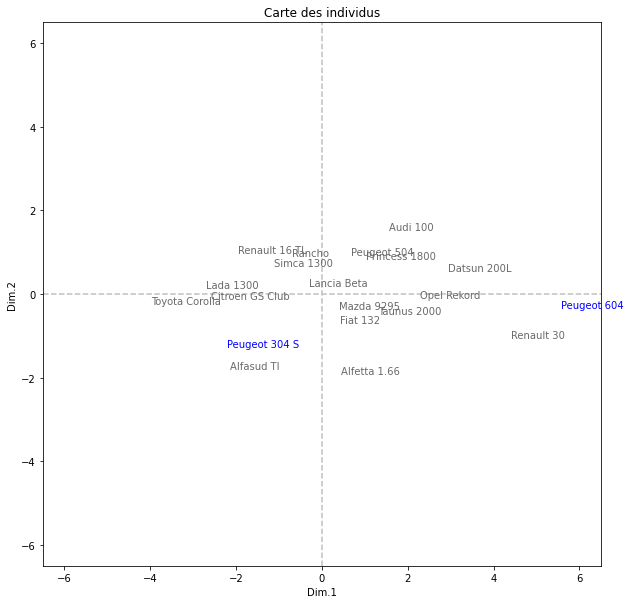

In [110]:
#position des points supplémentaires dans le plan
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(acp.row_coord_[:,0],acp.row_coord_[:,1],'wo')
ax.axis([-6.5,+6.5,-6.5,+6.5])
ax.plot([-6.5,+6.5],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-6.5,+6.5],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Carte des individus")
#points actifs
for i in range(n):
 ax.text(acp.row_coord_[i,0],acp.row_coord_[i,1],D.index[i],color="dimgray")
#points illutratifs
for i in range(IndSup.shape[0]):
 ax.text(coordSup[i,0],coordSup[i,1],IndSup.index[i],color="blue")

plt.show()


In [111]:
#nombre de facteurs à prendre en compte
q = 2


In [112]:
#quantile de la loi de Fisher à 95%
pf = stats.f.ppf(0.95,q,n-q)
print(pf)

3.63372346759163


In [113]:
#seuil
c = (q*(n**2-1))/(n*(n-q))*pf
print(c)


8.150643611334003


In [114]:
#étendue en abscisse
e1 = 2*math.sqrt(acp.eig_[0][0]*c)
print(e1)

12.005471835819806


In [115]:
#étendue en ordonnée
e2 = 2*math.sqrt(acp.eig_[0][1]*c)
print(e2)


5.282975914670268


In [116]:
#classe pour ellipse
from matplotlib.patches import Ellipse

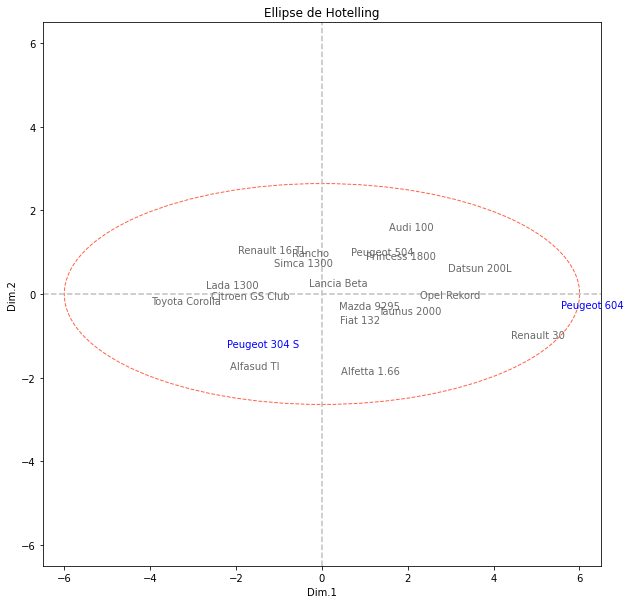

In [117]:
#position des points supplémentaires dans le plan
#rajouter l'ellipse de Hotelling
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(acp.row_coord_[:,0],acp.row_coord_[:,1],'wo')
ax.axis([-6.5,+6.5,-6.5,+6.5])
ax.plot([-6.5,+6.5],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-6.5,+6.5],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Ellipse de Hotelling")
#points actifs
for i in range(n):
 ax.text(acp.row_coord_[i,0],acp.row_coord_[i,1],D.index[i],color="dimgray")
#points illutratifs
for i in range(IndSup.shape[0]):
 ax.text(coordSup[i,0],coordSup[i,1],IndSup.index[i],color="blue")

#ellispe de Hotelling – centrée autour de l’origine
ellipse = Ellipse((0,0),width=e1,height=e2,facecolor='none',edgecolor='tomato',linestyle='--')
ax.add_patch(ellipse)

plt.show()

# Traitement des variables illustratives


In [118]:
#variables illustratives
varIllus = pandas.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="DATA_ACP_VAR_ILLUS",index_col=0)
print(varIllus)


                FINITION   PRIX  RPOIDPUIS
Modele                                    
Alfasud TI           2_B  30570  11.012658
Audi 100            3_TB  39990  13.058824
Simca 1300           1_M  29600  15.441176
Citroen GS Club      1_M  28250  15.762712
Fiat 132             2_B  34900  11.275510
Lancia Beta         3_TB  35480  13.170732
Peugeot 504          2_B  32300  14.683544
Renault 16 TL        2_B  32000  18.363636
Renault 30          3_TB  47700  10.312500
Toyota Corolla       1_M  26540  14.818182
Alfetta-1.66        3_TB  42395   9.724771
Princess-1800        2_B  33990  14.146341
Datsun-200L         3_TB  43980  11.913043
Taunus-2000          2_B  35010  11.020408
Rancho              3_TB  39450  14.112500
Mazda-9295           1_M  27900  13.192771
Opel-Rekord          2_B  32700  11.200000
Lada-1300            1_M  22100  14.044118


Variable illustrative quantitative


In [119]:
#corrélation de PRIX avec les 2 premiers facteurs
cPrix = numpy.corrcoef(varIllus.PRIX,acp.row_coord_[:,:2],rowvar=False)[0,1:]
print(cPrix)


[ 0.77 -0.09]


In [120]:
#corrélation de RPOIDPUIS avec les 2 premiers facteurs
cRPP = numpy.corrcoef(varIllus.RPOIDPUIS,acp.row_coord_[:,:2],rowvar=False)[0,1:]
print(cRPP)


[-0.59  0.67]


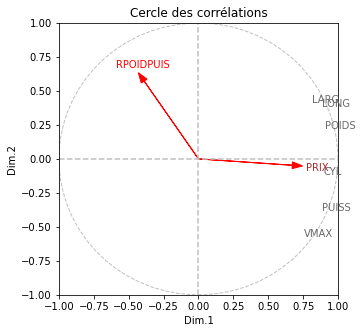

In [121]:
#placement des variables illustratives dans le cercle des corrélations
fig, ax = plt.subplots(figsize=(5,5))
ax.axis([-1,+1,-1,+1])
ax.plot([-1,+1],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-1,+1],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Cercle des corrélations")
#variables actives
for i in range(p):
 ax.text(acp.col_coord_[i,0],acp.col_coord_[i,1],D.columns[i],color="dimgray")
#variables illustratives
ax.text(cPrix[0],cPrix[1],'PRIX',color='brown')
ax.arrow(0,0,cPrix[0]-0.1,cPrix[1]+0.04,color='r',head_width=0.05)
ax.text(cRPP[0],cRPP[1],'RPOIDPUIS',color="red")
ax.arrow(0,0,cRPP[0]+0.2,cRPP[1]-0.1,color='r',head_width=0.05)
#cercle pour faire joli
ellipse = Ellipse((0,0),width=2,height=2,facecolor='none',edgecolor='silver',linestyle='--')
ax.add_patch(ellipse)

plt.show()


In [122]:
#corrélation de prix avec l'ensemble des (p = 6) facteurs
cPrixBis = numpy.corrcoef(varIllus.PRIX,acp.row_coord_[:,:],rowvar=False)[0,1:]
print(cPrixBis)


[ 0.77 -0.09  0.13  0.23  0.16  0.1 ]


In [123]:
#au carré : COS2
print(cPrixBis**2)

[0.6  0.01 0.02 0.05 0.03 0.01]


In [124]:
#somme n’est pas égale à 1 sur l’ensemble des facteurs, et c’est normal
print(numpy.sum(cPrixBis**2))

0.7091028079636765


In [125]:
#data frame temporaire
df = varIllus.copy()
df['F1'] = acp.row_coord_[:,0]
df['F2'] = acp.row_coord_[:,1]
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Alfasud TI to Lada-1300
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FINITION   18 non-null     object 
 1   PRIX       18 non-null     int64  
 2   RPOIDPUIS  18 non-null     float64
 3   F1         18 non-null     float64
 4   F2         18 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 864.0+ bytes
None


In [126]:
#effectif par groupe de FINITION
n_g = pandas.pivot_table(df,values='F1',index='FINITION',aggfunc='count')
print(n_g)

          F1
FINITION    
1_M        5
2_B        7
3_TB       6


In [127]:
#moyennes conditionnelles pour le 1er facteur
m_1 = pandas.pivot_table(df,values='F1',index='FINITION',aggfunc='mean')
print(m_1)


                F1
FINITION          
1_M      -2.000355
2_B       0.235313
3_TB      1.392430


In [128]:
#moyennes conditionnelles pour le 2nd facteur
m_2 = pandas.pivot_table(df,values='F2',index='FINITION',aggfunc='mean')
print(m_2)

                F2
FINITION          
1_M       0.022579
2_B      -0.045271
3_TB      0.034001


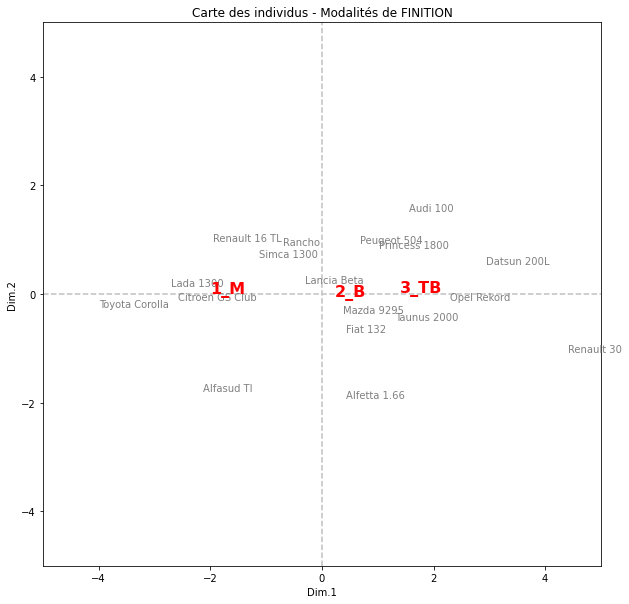

In [129]:
#représentation graphique avec les positions
#des points supplémentaires dans le plan
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(acp.row_coord_[:,0],acp.row_coord_[:,1],'wo')
ax.axis([-5,+5,-5,+5])
ax.plot([-5,+5],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-5,+5],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Carte des individus - Modalités de FINITION")
#points actifs
for i in range(n):
 ax.text(acp.row_coord_[i,0],acp.row_coord_[i,1],D.index[i],color="gray")

#position des modalités de la variable illustrative
for g in range(len(m_1.index)):
 ax.text(m_1.F1[g],m_2.F2[g],m_1.index[g],color="red",weight="bold",fontsize=16)

plt.show()

In [130]:
#(carré du) rapport de corrélation sur le 1er facteur
print(numpy.sum((n_g.F1/n)*(m_1.F1**2))/acp.eig_[0][0])

0.40248443698930525


In [131]:
#rapport de corrélation sur le 2nd facteur
print(numpy.sum((n_g.F1/n)*(m_2.F2**2))/acp.eig_[0][1])

0.0015465958518609553


In [132]:
#valeurs test sur le 1er facteur
vt_1 = (m_1.F1)/numpy.sqrt((n-n_g.F1)/(n-1)*(acp.eig_[0][0]/n_g.F1))
print(vt_1)


FINITION
1_M    -2.432717
2_B     0.368103
3_TB    1.930766
Name: F1, dtype: float64


In [133]:
#transformer Z en data frame
dfZ = pandas.DataFrame(Z,columns=D.columns,index=varIllus.index)
#rajouter la colonne FINITION
dfZ['FINITION'] = varIllus['FINITION']
#vérification
print(dfZ.info())


<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Alfasud TI to Lada-1300
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CYL       18 non-null     float64
 1   PUISS     18 non-null     float64
 2   LONG      18 non-null     float64
 3   LARG      18 non-null     float64
 4   POIDS     18 non-null     float64
 5   VMAX      18 non-null     float64
 6   FINITION  18 non-null     object 
dtypes: float64(6), object(1)
memory usage: 1.1+ KB
None


In [134]:
#moyennes conditionnelles sur les variables Z
mz_g = pandas.pivot_table(dfZ,index='FINITION',aggfunc='mean')
print(mz_g)


               CYL      LARG      LONG     POIDS     PUISS      VMAX
FINITION                                                            
1_M      -0.777851 -0.826236 -0.823850 -0.825200 -0.909552 -0.735509
2_B       0.253299  0.147542  0.083116 -0.050267 -0.009218  0.170188
3_TB      0.352693  0.516398  0.589573  0.746311  0.768714  0.414371


In [135]:
#distance à l'origine
disto2_g = numpy.apply_along_axis(arr=mz_g.values,axis=1,func1d=lambda x:numpy.sum(x**2))
print(numpy.sqrt(disto2_g))

[2.   0.35 1.43]


In [136]:
#COS2 sur le premier facteur
print((m_1.values[:,0]**2)/disto2_g)

[1.   0.45 0.94]


In [137]:
#COS2 sur le second facteur
print((m_2.values[:,0]**2)/disto2_g)

[0.   0.02 0.  ]
